In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict
from dotenv import load_dotenv

In [2]:
load_dotenv()

model = ChatGoogleGenerativeAI(model = "gemini-2.5-flash-preview-05-20", temperature=0.2)

In [12]:
class BlogState(TypedDict):
    title : str
    outline : str
    content : str
    evaluate :str

In [5]:
def create_outline(state : BlogState) -> BlogState:
    # fetch the title
    title = state['title']

    # call llm gen outline
    prompt = f"Generate a detailed outline for a blog on the topic - {title}"
    outline = model.invoke(prompt).content

    # update status
    state['outline'] = outline

    return state

In [6]:
def create_blog(state : BlogState) -> BlogState:
    title = state['title']
    outline = state['outline']

    prompt = f'Write a detailed blog on the title - {title} using the follwing outline \n {outline}'

    content = model.invoke(prompt).content

    state['content'] = content

    return state

In [13]:
def evaluate_blog(state: BlogState) -> BlogState:
    if state['content'] is not None:
        outline = state['outline']
        content = state['content']

        prompt = f"Based on the {outline} for the blog post strictly evaluate whether the generated {content} is contextually correct or not"

        evaluate = model.invoke(prompt).content

        state['evaluate'] = evaluate

        return state

In [14]:
# create graph
graph = StateGraph(BlogState)

# add nodes
graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)
graph.add_node('evaluate_blog', evaluate_blog)

# add edges
graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', 'evaluate_blog')
graph.add_edge('evaluate_blog', END)

# compile
workflow = graph.compile()

In [15]:
initial_state = {'title' : 'Rise of AI in Nepal'}
final_state = workflow.invoke(initial_state)

print(final_state)

{'title': 'Rise of AI in Nepal', 'outline': 'Here\'s a detailed outline for a blog post on the "Rise of AI in Nepal," designed to be informative, engaging, and well-structured.\n\n---\n\n## Blog Post Outline: The Quiet Revolution: Unpacking the Rise of AI in Nepal\n\n**Target Audience:** General public, tech enthusiasts, students, policymakers, entrepreneurs, investors interested in Nepal\'s tech landscape.\n\n**Tone:** Informative, balanced, forward-looking, slightly optimistic but acknowledging challenges.\n\n**Keywords:** AI in Nepal, Nepal technology, Artificial Intelligence, Nepali startups, Digital Nepal, AI applications Nepal, Future of work Nepal, Tech education Nepal.\n\n---\n\n### I. Catchy Title Options:\n*   The Quiet Revolution: Unpacking the Rise of AI in Nepal\n*   Beyond the Mountains: How AI is Reshaping Nepal\'s Future\n*   Nepal\'s Digital Dawn: Exploring the Emergence of Artificial Intelligence\n*   From Himalayas to High-Tech: The Growing Footprint of AI in Nepal\n

In [20]:
print(final_state['outline'])

Here's a detailed outline for a blog post on the "Rise of AI in Nepal," designed to be informative, engaging, and well-structured.

---

## Blog Post Outline: The Quiet Revolution: Unpacking the Rise of AI in Nepal

**Target Audience:** General public, tech enthusiasts, students, policymakers, entrepreneurs, investors interested in Nepal's tech landscape.

**Tone:** Informative, balanced, forward-looking, slightly optimistic but acknowledging challenges.

**Keywords:** AI in Nepal, Nepal technology, Artificial Intelligence, Nepali startups, Digital Nepal, AI applications Nepal, Future of work Nepal, Tech education Nepal.

---

### I. Catchy Title Options:
*   The Quiet Revolution: Unpacking the Rise of AI in Nepal
*   Beyond the Mountains: How AI is Reshaping Nepal's Future
*   Nepal's Digital Dawn: Exploring the Emergence of Artificial Intelligence
*   From Himalayas to High-Tech: The Growing Footprint of AI in Nepal
*   AI in the Land of Everest: Opportunities, Challenges, and the Ro

In [11]:
print(final_state['content'])

## The Digital Ascent: Unpacking the Rise of AI in Nepal

Artificial Intelligence is no longer a futuristic concept confined to sci-fi movies; it's a present-day reality transforming industries, economies, and daily lives across the globe. From powering personalized recommendations to enabling groundbreaking scientific discoveries, AI's pervasive impact is undeniable. While often associated with its majestic Himalayas and rich cultural heritage, Nepal is quietly but steadily embracing this digital wave, with Artificial Intelligence emerging as a significant force.

This blog post delves into the nascent but promising rise of AI in Nepal, examining its current applications, the factors fueling its growth, the immense opportunities it presents, and the critical challenges that must be addressed for its sustainable development. Join us as we explore how the land of Everest is charting its course in the age of algorithms.

### Understanding AI in the Nepali Context

At its core, Artificial

In [22]:
print(final_state['evaluate'])

The generated blog post, "The Quiet Revolution: Unpacking the Rise of AI in Nepal," is **exceptionally well-structured and contextually correct**, adhering almost perfectly to the detailed outline provided.

Here's a breakdown of the evaluation:

**I. Catchy Title Options:**
*   **Outline:** "The Quiet Revolution: Unpacking the Rise of AI in Nepal" was the first option.
*   **Blog Post:** Uses this exact title.
*   **Evaluation:** **Perfectly aligned.**

**II. Introduction:**
*   **Outline Requirements:** Hook (global AI), narrowing to Nepal, clear thesis statement, brief overview of sections.
*   **Blog Post Content:**
    *   **Hook:** Starts with the global AI phenomenon and its transformative power.
    *   **Narrowing Down:** Smoothly transitions to AI reaching the Himalayas and shaping Nepal.
    *   **Thesis Statement:** Clearly states the post will explore the rise, landscape, applications, drivers, opportunities, challenges, and sustainable development.
    *   **Brief Overvie

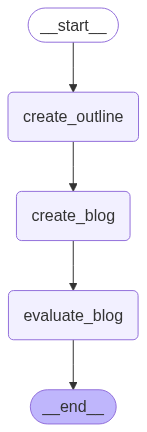

In [23]:
workflow